In [566]:
import numpy as np
import time
import matplotlib.pyplot as plt

np.random.seed(1)

You are given a basic, bare-bones neural network written in Numpy in MLP Programming module on canvas. You will take basis in that code and add some modifications. These are as follows:

1: Replace the activation function with the Sigmoid function. Train the network, and compare with the original activation function. What differences did you experience? Why do you think this difference happened?

2: Do a search for the best learning rate. Also experiment with the necessary number of epochs. Use these values for learning rate: [0.001, 0.01, 0.1, 1, 10]. Report on your findings.

3: Add another “hidden” layer(hidden layers exist between the input and output layers). Choose the size of the layer yourself. Retrain the network. Here, your knowledge about learning rate and epochs from the previous task might come in handy. Is this network more or less performant than the previous version? What does this change imply?

4. Understanding the effect of activation function: Repeat the experiment as in 3. but by including an activation functions at various stages as shown. 

In [567]:

# sigmoid
def sigmoid_function(x):
    return (1/(1 + np.exp(-x)))

def derivative_sigmoid_function(x):
    return (np.exp(-x)/(1 + np.exp(-x))**2)


# default
def relu(x):
    return (x > 0) * x 

def relu_grad(x):
    return x > 0

In [568]:
streetlights = np.array([[1,0,1], 
                         [0,1,1], 
                         [0,0,1], 
                         [1,1,1], 
                         [0,1,1], 
                         [1,0,1]])

In [569]:
walk_vs_stop = np.array([[0], [1], [0], [1], [1], [0]])

In [570]:
X,y = streetlights, walk_vs_stop

In [571]:
hidden_nodes = 8

In [572]:
epochs = 1000  # number of iterations to go through the network

lr = 0.01

lr_array =  [0.001, 0.01, 0.1, 1, 10] #[0.001, 0.01, 0.1,]   # [0.01]  # how much we change the weights of the network each iteration

In [573]:
def aggregate_errors(errors):
    errors.reshape()

def training(lr_array, epochs, activation_function, derivative_function, hidden_nodes):

    errors = []

    ws_1 = np.random.rand(X.shape[1], hidden_nodes) - 0.5
    ws_2 = np.random.rand(hidden_nodes, y.shape[1]) - 0.5

    for lr in lr_array:
        for epoch in range(epochs):     #number of training iterations, or times to change the weights of the nn
            for i in range(X.shape[0]): #for all samples in X, each streetlight
                layer_in = X[i:i+1]

                #forward pass/prediction
                layer_1 = activation_function(layer_in.dot(ws_1))

                layer_out = layer_1.dot(ws_2)

                #calc error/distance (how far are we from goal)
                delta_2 = layer_out - y[i:i+1]

                #calc the the error each node in prev layer contributed
                delta_1 = delta_2.dot(ws_2.T) * derivative_function(layer_1)

                #update weights
                ws_2 -= lr * (layer_1.T.reshape(hidden_nodes,1).dot(delta_2))
                ws_1 -= lr * (layer_in.T.reshape(X.shape[1],1).dot(delta_1))
                
            #if epoch % 10 == 0:    
            error = delta_2**2
            errors.append(error[0][0])
                #print(round(error[0][0],6))#, end='\r')
    
    return errors


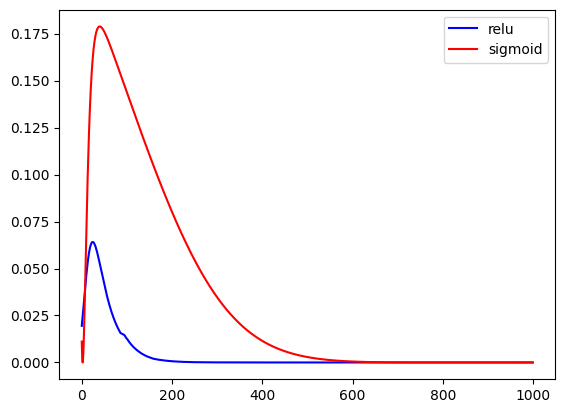

In [574]:
## Oppgave 1

relu_errors = training([lr], epochs, relu, relu_grad, hidden_nodes)
sigmoid_errors = training([lr], epochs, sigmoid_function, derivative_sigmoid_function, hidden_nodes)

plt.figure(1)
plt.plot(relu_errors, "-b", label="relu")
plt.plot(sigmoid_errors, "-r", label="sigmoid")
plt.legend(loc="upper right")

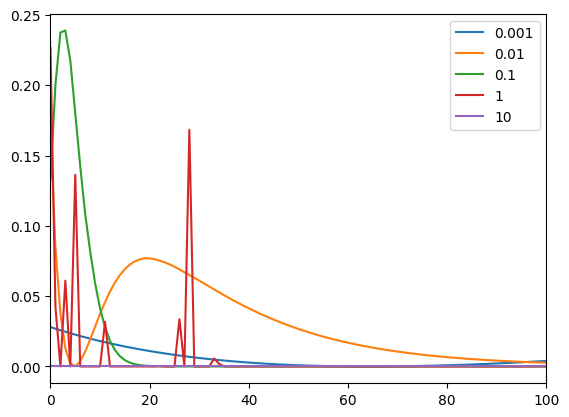

In [575]:
# Oppgave 2

plt.figure(2)

#def training_multiple(lr_array, epochs, activation_function, derivative_function, hidden_nodes):
#
#    ws_1 = np.random.rand(X.shape[1], hidden_nodes) - 0.5
#    ws_2 = np.random.rand(hidden_nodes, y.shape[1]) - 0.5
#
#    for lr in lr_array:
#        errors = []
#        
#        for epoch in range(epochs):     #number of training iterations, or times to change the weights of the nn
#            for i in range(X.shape[0]): #for all samples in X, each streetlight
#                layer_in = X[i:i+1]
#
#                #forward pass/prediction
#                layer_1 = activation_function(layer_in.dot(ws_1))
#
#                layer_out = layer_1.dot(ws_2)
#
#                #calc error/distance (how far are we from goal)
#                delta_2 = layer_out - y[i:i+1]
#
#                #calc the the error each node in prev layer contributed
#                delta_1 = delta_2.dot(ws_2.T) * derivative_function(layer_1)
#
#                #update weights
#                ws_2 -= lr * (layer_1.T.reshape(hidden_nodes,1).dot(delta_2))
#                ws_1 -= lr * (layer_in.T.reshape(X.shape[1],1).dot(delta_1))
#                
#            if epoch % 10 == 0:    
#                error = delta_2**2
#                errors.append(error[0][0])
#                #print(round(error[0][0],6))#, end='\r')
#    
#        plt.plot(errors,label=str(lr))



for lri in lr_array:
    plt.plot(training([lri], epochs, relu, relu_grad, hidden_nodes), label=str(lri))
    
plt.xlim(0, 100)
plt.legend(loc="upper right")
